In [1]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import plotly.graph_objs as go

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.endswith(destino)    
        if x==True:                         
            lista.append(trayectos)
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)      
    
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.endswith(destino)    
        if x==True:                         
            lista.append(trayectos)
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.endswith(destino)    
        if x==True:                         
            lista.append(trayectos)
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Cambiamos la frecuencia a dias
    df1_Final.index.freq = df1_Final.index.inferred_freq
    df1_Dia = df1_Final.resample('24H').sum()
    
    df2_Final.index.freq = df2_Final.index.inferred_freq
    df2_Dia = df2_Final.resample('24H').sum()
    
    df3_Final.index.freq = df3_Final.index.inferred_freq
    df3_Dia = df3_Final.resample('24H').sum()
    
    #Sacamos una lista de los trayectos destino en comun con mayor número de viajes
    mean_df1 = df1_Dia.mean()
    mean_dict1 = mean_df1.to_dict()
    main_lines1 = list(dict.keys(dict(filter(lambda x: x[1] > 15000, mean_dict1.items())))) #Obtengo las claves de las columnas con un promedio por dia mayor a 8000        
    
    mean_df2 = df2_Dia.mean()
    mean_dict2 = mean_df2.to_dict()
    main_lines2 = list(dict.keys(dict(filter(lambda x: x[1] > 10000, mean_dict2.items())))) #Obtengo las claves de las columnas con un promedio por dia mayor a 8000        
    
    mean_df3 = df3_Dia.mean()
    mean_dict3 = mean_df3.to_dict()
    main_lines3 = list(dict.keys(dict(filter(lambda x: x[1] > 10000, mean_dict3.items())))) #Obtengo las claves de las columnas con un promedio por dia mayor a 8000        
    
    #Sacamos solo los trayectos principales 
    main_lines1.insert(0,"ds")    
    df_main_lines1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=main_lines1)
    
    main_lines2.insert(0,"ds")    
    df_main_lines2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=main_lines2)
    
    main_lines3.insert(0,"ds")    
    df_main_lines3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=main_lines3)
        
    #Añadimos nuevas columnas
    df_main_lines1['Fecha'] = df_main_lines1.index.date
    df_main_lines1['Año'] = df_main_lines1.index.year                                
    df_main_lines1['Mes'] = df_main_lines1.index.month                               
    df_main_lines1['ID_Dia'] = df_main_lines1.index.dayofweek
    df_main_lines1['Hora'] = df_main_lines1.index.hour
    
    df_main_lines2['Fecha'] = df_main_lines2.index.date
    df_main_lines2['Año'] = df_main_lines2.index.year                                
    df_main_lines2['Mes'] = df_main_lines2.index.month                               
    df_main_lines2['ID_Dia'] = df_main_lines2.index.dayofweek
    df_main_lines2['Hora'] = df_main_lines2.index.hour
    
    df_main_lines3['Fecha'] = df_main_lines3.index.date
    df_main_lines3['Año'] = df_main_lines3.index.year                                
    df_main_lines3['Mes'] = df_main_lines3.index.month                               
    df_main_lines3['ID_Dia'] = df_main_lines3.index.dayofweek
    df_main_lines3['Hora'] = df_main_lines3.index.hour
    
    return df_main_lines1,df_main_lines2,df_main_lines3,main_lines1,main_lines2,main_lines3

In [3]:
origen = "2807901"
destino = "2807905"
df_main_lines1,df_main_lines2,df_main_lines3,main_lines1,main_lines2,main_lines3 = df_origen(origen,destino)
df_main_lines1.head(5)
df_main_lines2.head(5)
df_main_lines3.head(5)

,2807904-2807905,2807908-2807905,2807916-2807905,Fecha,Año,Mes,ID_Dia,Hora
ds,,,,,,,,
2020-08-01 00:00:00,309.576,252.287,176.117,2020-08-01,2020,8,5,0
2020-08-01 01:00:00,149.002,259.060,171.697,2020-08-01,2020,8,5,1
2020-08-01 02:00:00,103.411,170.127,102.834,2020-08-01,2020,8,5,2
2020-08-01 03:00:00,35.934,105.155,105.642,2020-08-01,2020,8,5,3
2020-08-01 04:00:00,31.213,116.663,56.070,2020-08-01,2020,8,5,4


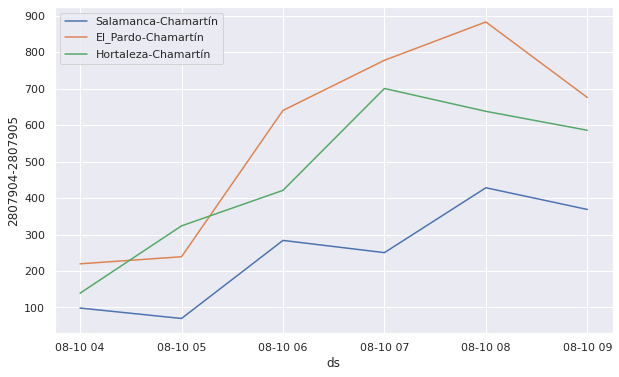

In [4]:
sb.set(rc = {'figure.figsize':(10,6)})
#for trayecto in lista:
for trayecto in main_lines3:
    if trayecto=="ds":                
        continue
    origen = trayecto.split("-",1)[0]
    destino = trayecto.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}    
    x=trayecto.endswith(destino)
    if x==True:
        sb.lineplot(x="ds", y=trayecto, data=df_main_lines3.loc['2020-08-10 04:00:00':'2020-08-10 09:00:00'],legend='brief',label=lines_names[origen]+'-'+lines_names[destino])        

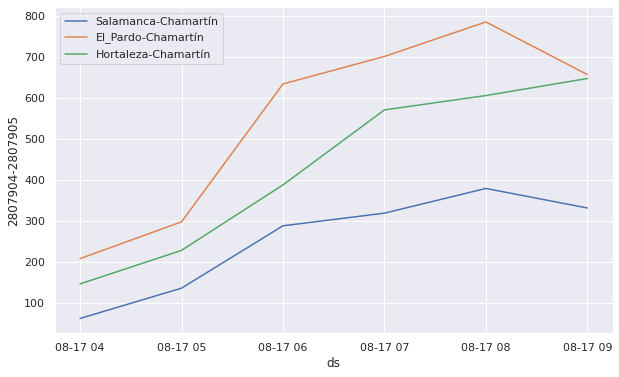

In [5]:
sb.set(rc = {'figure.figsize':(10,6)})
#for trayecto in lista:
for trayecto in main_lines3:
    if trayecto=="ds":                
        continue
    origen = trayecto.split("-",1)[0]
    destino = trayecto.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}    
    x=trayecto.endswith(destino)
    if x==True:
        sb.lineplot(x="ds", y=trayecto, data=df_main_lines3.loc['2020-08-17 04:00:00':'2020-08-17 09:00:00'],legend='brief',label=lines_names[origen]+'-'+lines_names[destino])        

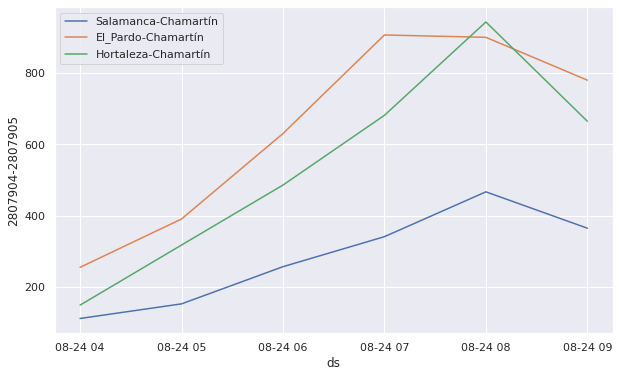

In [6]:
sb.set(rc = {'figure.figsize':(10,6)})
#for trayecto in lista:
for trayecto in main_lines3:
    if trayecto=="ds":                
        continue
    origen = trayecto.split("-",1)[0]
    destino = trayecto.split("-",1)[1]    
    lines_names = {"19024":"Fuera_Madrid","2800601":"Fuera_Madrid","2806504":"Fuera_Madrid","2807901":"Centro","2807902":"Arganzuela","2807903":"Retiro","2807904":"Salamanca","2807905":"Chamartín","2807906":"Tetuán","2807907":"Chamberí","2807908":"El_Pardo","2807909":"Moncloa-Aravaca","2807910":"Latina","2807911":"Carabanchel","2807912":"Usera","2807913":"Puente_de_Vallecas","2807914":"Moratalaz","2807915":"Ciudad_Lineal","2807916":"Hortaleza","2807917":"Villaverde","2807918":"Villa_de_Vallecas","2807919":"Vicálvaro","2807920":"San Blas-Canillejas","2812301":"Fuera_Madrid"}    
    x=trayecto.endswith(destino)
    if x==True:
        sb.lineplot(x="ds", y=trayecto, data=df_main_lines3.loc['2020-08-24 04:00:00':'2020-08-24 09:00:00'],legend='brief',label=lines_names[origen]+'-'+lines_names[destino])                